<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 300%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Load Prediction</div>

<a id="table of content"></a>

<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜Table of Content📜</div>

<a id="contents_tabel"></a>   

* [1- Importing Libraries📚](#1)
    
* [2- Loading the Dataset📊](#2)
    
* [3- Dataset Overview🔍](#3)

    * [3-1- Checking Null Values📊](#4)
    
    * [3-2- Visualization📊](#5)
    
* [4- Preprocessing🛠️](#6)

    * [4-1- Determining the Best Sequence Length🛠️](#7)

    * [4-2- Scaling📏](#8)
    
    * [4-3- Preparing Sequence data📈](#9)
        
* [5- LSTM Model🧠](#10)     
     
    * [5-1- Building the Architecture ⚡](#11)
    
    * [5-2- Using Optuna for Hyperparameters Tuning⚡](#12)
    
    * [5-3- Model Training with the Best Hyperparameters🚀](#13)

    * [5-4- Model Evaluation⚖️](#14)
    

<a id='1'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📚Importing Libraries📚</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
!pip install optuna
# !pip install tensorflow pydot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    LSTM,
    Dense,
    Softmax,
    Multiply,
    Flatten,
    Dropout
)
import optuna
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from IPython.display import Image

<a id='2'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📚Loading the Dataset📚</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
# Load the dataset
df = pd.read_csv('PDB_Load_History.csv')

<a id='3'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔍Dataset Overview🔍</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [4]:
# Display the first few rows of the dataset
df.head(48)

,date,year,month,day,weekday,hour,demand,temperature
0,3/1/2003,2003,3,1,7,1,12863.0,29
1,3/1/2003,2003,3,1,7,2,12389.0,28
2,3/1/2003,2003,3,1,7,3,12155.0,29
3,3/1/2003,2003,3,1,7,4,12072.0,27
4,3/1/2003,2003,3,1,7,5,12160.0,29
5,3/1/2003,2003,3,1,7,6,12568.0,28
6,3/1/2003,2003,3,1,7,7,13236.0,29
7,3/1/2003,2003,3,1,7,8,14190.0,29
8,3/1/2003,2003,3,1,7,9,15213.0,28
9,3/1/2003,2003,3,1,7,10,15647.0,27


In [5]:
print('Some information about the dataset:')
print(df.info())

Some information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103776 entries, 0 to 103775
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         103776 non-null  object 
 1   year         103776 non-null  int64  
 2   month        103776 non-null  int64  
 3   day          103776 non-null  int64  
 4   weekday      103776 non-null  int64  
 5   hour         103776 non-null  int64  
 6   demand       103776 non-null  float64
 7   temperature  103776 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.3+ MB
None


In [6]:
# Convert 'date' to datetime for easier manipulation
df['date'] = pd.to_datetime(df['date'])

# Extract the peak demand for each day
data = df.loc[df.groupby('date')['demand'].idxmax()]

# Sort by date to maintain chronological order
data = data.sort_values(by='date').reset_index(drop=True)

# Display the resulting daily peak dataset
data.head()

,date,year,month,day,weekday,hour,demand,temperature
0,2003-03-01,2003,3,1,7,19,16386.0,35
1,2003-03-02,2003,3,2,1,19,16842.0,36
2,2003-03-03,2003,3,3,2,19,19997.0,12
3,2003-03-04,2003,3,4,3,19,18908.0,31
4,2003-03-05,2003,3,5,4,19,18091.0,40


In [7]:
print('The shape of the first dataset:', df.shape)
print('The shape of the new dataset (extracting peak loads):',data.shape)

The shape of the first dataset: (103776, 8)
The shape of the new dataset (extracting peak loads): (4324, 8)


<a id='4'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📊Checking Null Values📊</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [9]:
data.isnull().sum()

,0
date,0
year,0
month,0
day,0
weekday,0
hour,0
demand,0
temperature,0


<a id='5'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📊Visualization📊</div>

⬆️ [Tabel of Contents](#contents_tabel)

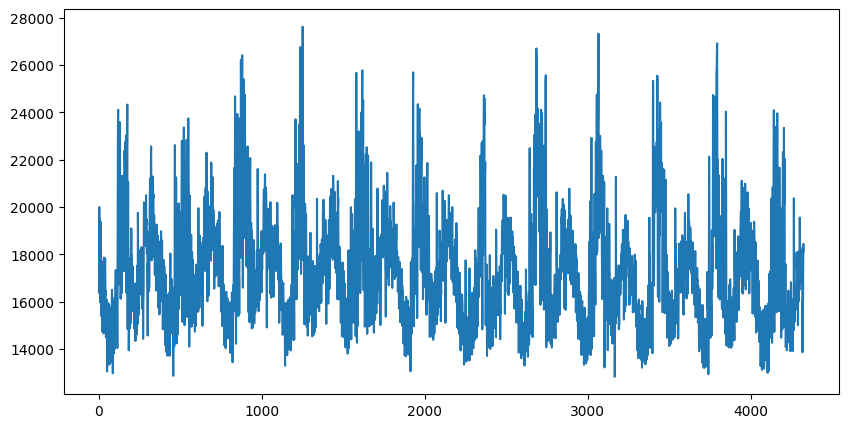

In [10]:
data['demand'].plot(figsize=(10,5))
plt.show()

<a id='6'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠️Preprocessing🛠️</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [11]:
# Split the data into training and testing sets
split_idx = int(len(data) * 0.8)
train_data = data[:split_idx]
test_data = data[split_idx:]

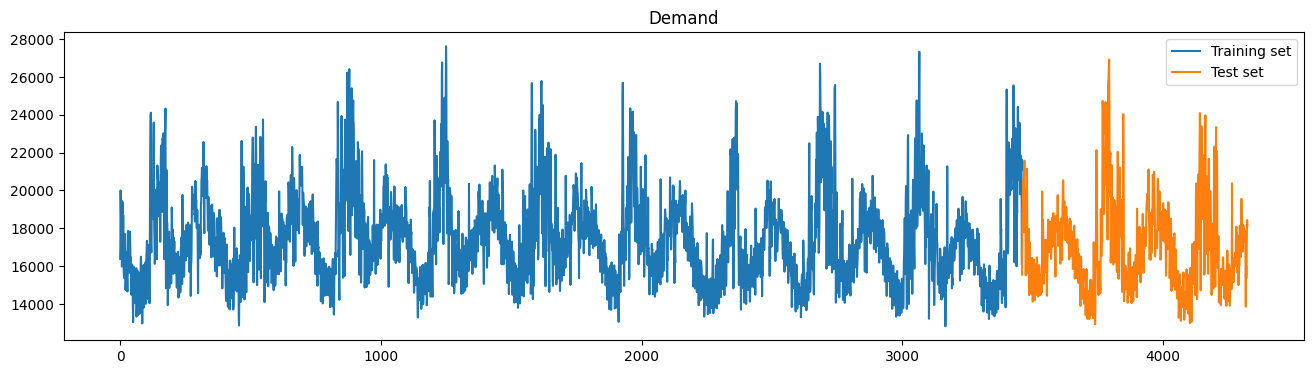

In [12]:
# We have chosen 'Demand' attribute for prices.
data["demand"][:split_idx].plot(figsize=(16,4),legend=True)
data["demand"][split_idx:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('Demand')
plt.show()

<a id='7'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠️Determining the Best Sequence Length🛠️</div>

⬆️ [Tabel of Contents](#contents_tabel)

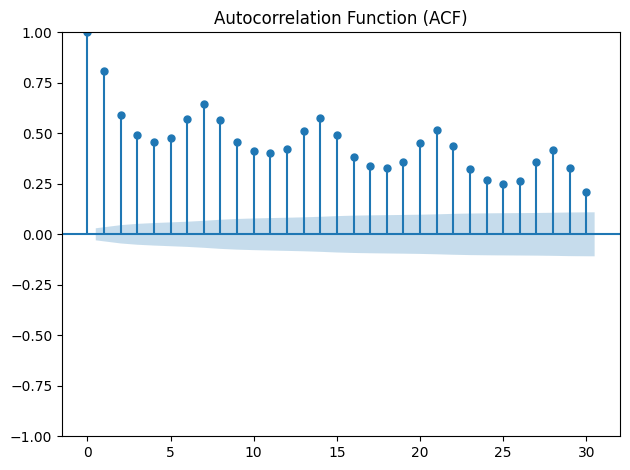

In [13]:
# daily_peak
daily_peak = data['demand']

# Plot ACF
plot_acf(daily_peak, lags=30)  # ACF for up to 30 lags
plt.title('Autocorrelation Function (ACF)')

plt.tight_layout()
plt.show()

<a id='8'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📏Scaling📏</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [14]:
train_data = train_data.drop(['date'], axis=1)
test_data = test_data.drop(['date'], axis=1)

In [15]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both training and testing data
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

<a id='9'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📈Preparing Sequence data📈</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [16]:
# Define a function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, 5]  # Target is the Demand
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [17]:
SEQ_LENGTH = 7  # Number of days to look back
X_train, y_train = create_sequences(scaled_train_data, SEQ_LENGTH)
X_test, y_test = create_sequences(scaled_test_data, SEQ_LENGTH)

In [18]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (3452, 7, 7)
shape of X_test: (858, 7, 7)
shape of y_train: (3452,)
shape of y_test: (858,)


<a id='10'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧠LSTM model🧠</div>

<a id='11'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚡Building the Architecture⚡</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [19]:
def build_model(input_shape, lstm_units, dense_units, dropout_rate, activation):
    # Input layer
    inputs = Input(shape=input_shape, name='Input_Layer')

    # LSTM layer
    lstm_out = LSTM(lstm_units, return_sequences=True, name='LSTM_Layer')(inputs)

    # Attention mechanism
    attention_scores = Dense(1, activation='tanh', name='Attention_Scores')(lstm_out)
    attention_weights = Softmax(axis=1, name='Attention_Weights')(attention_scores)
    attention_output = Multiply(name='Attention_Apply')([lstm_out, attention_weights])

    # Flatten the attention output
    flattened_output = Flatten(name='Flatten')(attention_output)

    # Dense layers
    dense1 = Dense(dense_units, activation=activation, name='Dense_1')(flattened_output)
    dense1 = Dropout(dropout_rate, name='Dropout_1')(dense1)

    dense2 = Dense(dense_units // 2, activation=activation, name='Dense_2')(dense1)
    dense2 = Dropout(dropout_rate, name='Dropout_2')(dense2)

    # Output layer
    outputs = Dense(1, activation='linear', name='Output_Layer')(dense2)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs, name='LSTM_Attention_Model')

    return model


<a id='12'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚡Using Optuna for Hyperparameters Tuning⚡</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [20]:
def objective(trial):
    # Define hyperparameters
    lstm_units = trial.suggest_categorical('lstm_units', [32, 64, 128, 256])
    dense_units = trial.suggest_categorical('dense_units', [32, 64, 128])
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5, step=0.1)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 125, 256, 512, 1024])


    # Build and compile the model
    model = build_model(input_shape=(7, 7),
                        lstm_units=lstm_units,
                        dense_units=dense_units,
                        dropout_rate=dropout_rate,
                        activation=activation)

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse',
                  metrics=['mae'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=30,
        verbose=0
    )

    # Evaluate on validation data
    val_loss = min(history.history['val_loss'])
    return val_loss

In [22]:
# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters:", study.best_params)

[I 2025-01-02 19:20:06,666] A new study created in memory with name: no-name-e98c7522-5599-47d7-88a3-1fdc05b81ef6
<ipython-input-20-505f3f9425b1>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2025-01-02 19:20:19,179] Trial 0 finished with value: 0.006639962084591389 and parameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.1, 'activation': 'tanh', 'learning_rate': 0.00025853853941171435, 'batch_size': 256}. Best is trial 0 with value: 0.006639962084591389.
[I 2025-01-02 19:20:29,556] Trial 1 finished with value: 0.004674798343330622 and parameters: {'lstm_units': 256, 'dense_units': 64, 'dropout_rate': 0.5, 'activation': 'tanh', 'learning_rate': 0.0008554352748741214, 'batch_size': 125}. Best is trial 1 with value: 0.004674798343330622.


Best hyperparameters: {'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.1, 'activation': 'relu', 'learning_rate': 0.002877574198998626, 'batch_size': 32}


<a id='13'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🚀 Model Training with the Best Hyperparameters🚀</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [23]:
# Best hyperparameters from Optuna
best_params = {'lstm_units': 256,
               'dense_units': 128,
               'dropout_rate': 0.1,
               'activation': 'relu',
               'learning_rate': 0.002877574198998626,
               'batch_size': 32}

# Build and compile the best model
model = build_model(
    input_shape=(7, 7),
    lstm_units=best_params['lstm_units'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate'],
    activation=best_params['activation']
)
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mse', metrics=['mae'])

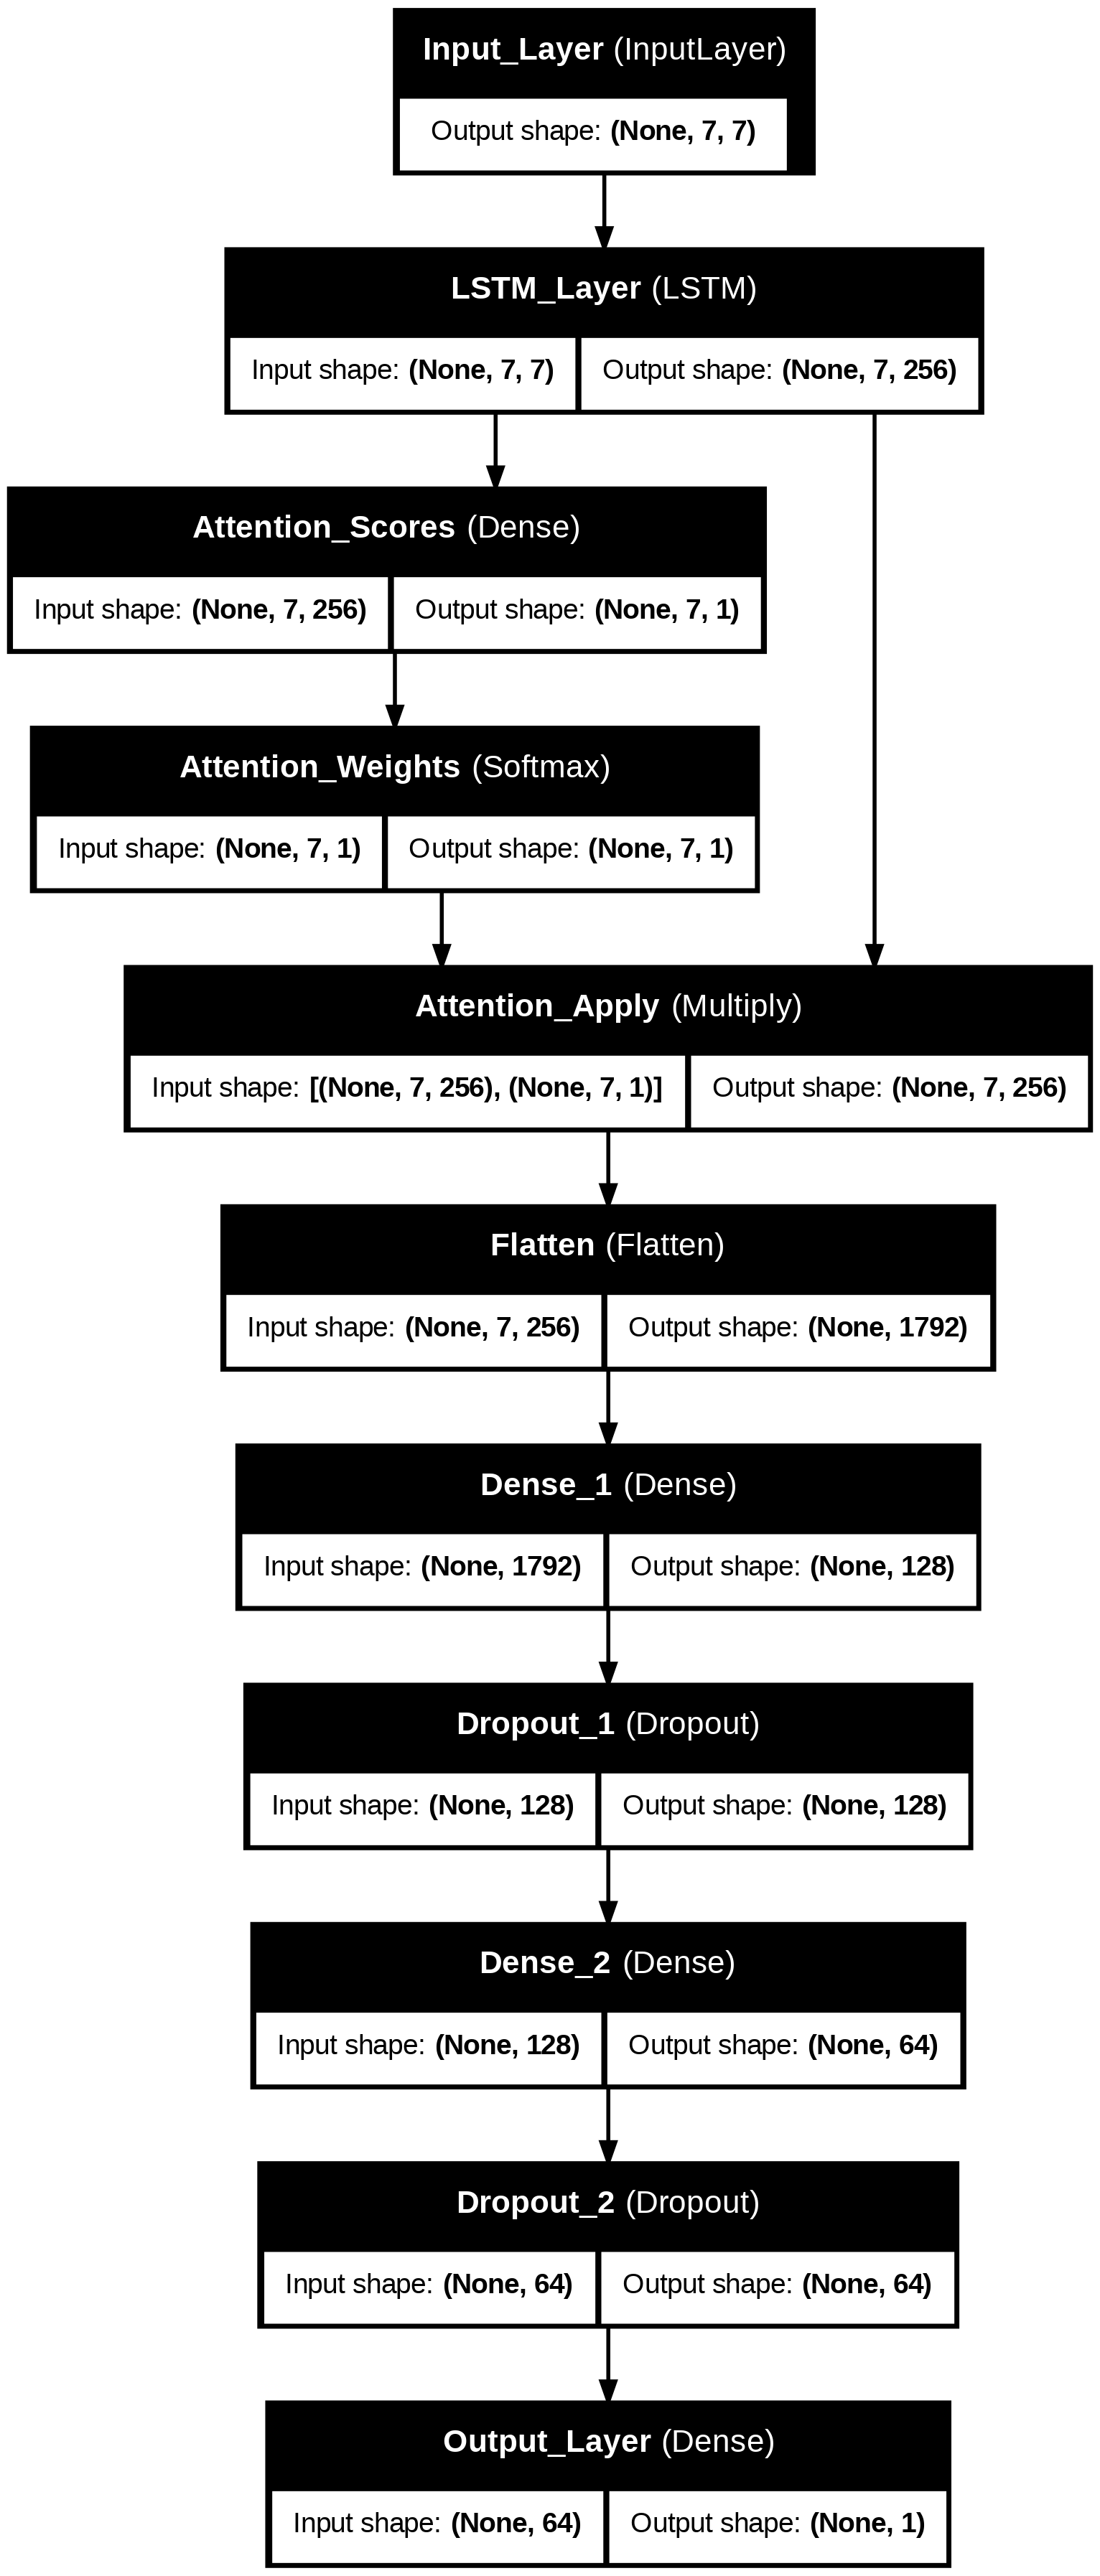

In [24]:
# Save the best model
model.save('best_lstm_attention_model.keras')

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


# Display the image (optional)
Image('model_architecture.png')

In [25]:
# Print model summary
model.summary()

Model: "LSTM_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)  │ (None, 7, 7)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ LSTM_Layer (LSTM)         │ (None, 7, 256)         │        270,336 │ Input_Layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Attention_Scores (Dense)  │ (None, 7, 1)           │            257 │ LSTM_Layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Attention_Weights         │ (None, 7, 1)           │              0 │ Attention_Scores[0][0] │
│ (Softmax)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Attention_Apply           │ (None, 7, 256)         │              0 │ LSTM_Layer[0][0],      │
│ (Multiply)                │                        │                │ Attention_Weights[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Flatten (Flatten)         │ (None, 1792)           │              0 │ Attention_Apply[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dense_1 (Dense)           │ (None, 128)            │        229,504 │ Flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dropout_1 (Dropout)       │ (None, 128)            │              0 │ Dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dense_2 (Dense)           │ (None, 64)             │          8,256 │ Dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dropout_2 (Dropout)       │ (None, 64)             │              0 │ Dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output_Layer (Dense)      │ (None, 1)              │             65 │ Dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 508,418 (1.94 MB)

 Trainable params: 508,418 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_attention_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=best_params['batch_size'],
    epochs=100,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0311 - mae: 0.1301 - val_loss: 0.0113 - val_mae: 0.0789
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0120 - mae: 0.0798 - val_loss: 0.0092 - val_mae: 0.0660
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mae: 0.0646 - val_loss: 0.0056 - val_mae: 0.0535
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mae: 0.0541 - val_loss: 0.0076 - val_mae: 0.0629
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mae: 0.0544 - val_loss: 0.0050 - val_mae: 0.0503
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mae: 0.0497 - val_loss: 0.0055 - val_mae: 0.0521
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - mae: 0.0541 - val_loss: 0.0047 - val_mae: 0.0461
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mae: 0.0517 - val_loss: 0.0048 - val_mae: 0.0463
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

<a id='14'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚖️Model Evaluation⚖️</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [27]:
loss = model.evaluate(X_test, y_test)
print(f"Model Evaluation:\nMAE: {loss}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0416
Model Evaluation:
MAE: [0.004357527010142803, 0.04414507374167442]


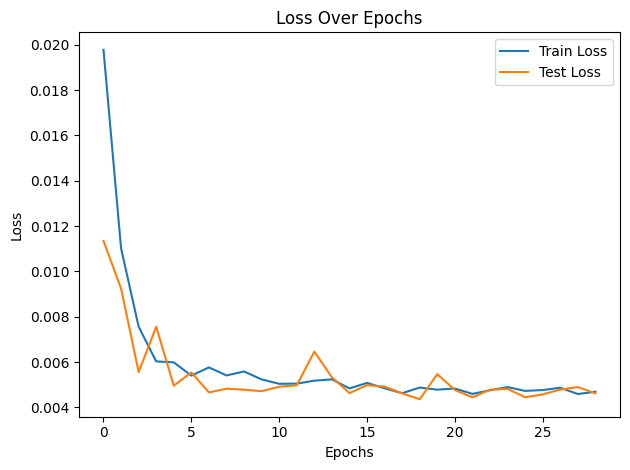

In [28]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)
predicted = np.concatenate([train_predicted, test_predicted], axis=0)

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
# Prepare the array for inverse transformation
predicted_full = np.zeros((predicted.shape[0], scaled_train_data.shape[1]))
predicted_full[:, 5] = predicted[:, 0]  # Place predicted Demand the correct column

# Inverse transform
predicted_prices = scaler.inverse_transform(predicted_full)[:, 5]

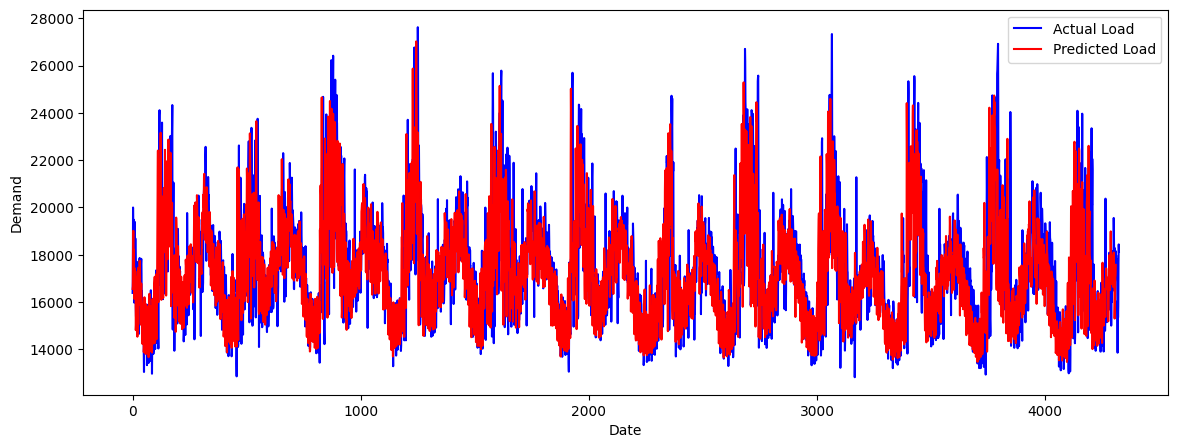

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(data['demand'].values, color='blue', label='Actual Load')
plt.plot(predicted_prices, color='red', label='Predicted Load')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [32]:
# Inverse transform for test_predicted
predicted_full_test = np.zeros((test_predicted.shape[0], scaled_train_data.shape[1]))
predicted_full_test[:, 5] = test_predicted[:, 0]  # Place predicted Demand in the correct column
predicted_prices_test = scaler.inverse_transform(predicted_full_test)[:, 5]

# Inverse transform y_test
y_test_full = np.zeros((y_test.shape[0], scaled_train_data.shape[1]))
y_test_full[:, 5] = y_test
y_test_actual = scaler.inverse_transform(y_test_full)[:, 5]

In [33]:
# Plot the results using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=data[split_idx:]['date'], y=y_test_actual, mode='lines', name='Actual Load'))
fig.add_trace(go.Scatter(x=data[split_idx:]['date'], y=predicted_prices_test, mode='lines', name='Predicted Load'))

fig.update_layout(title='Load Prediction',
                  xaxis_title='Date',
                  yaxis_title='Demand',
                  legend_title='Legend')

fig.show()

<img src="https://thumbs.dreamstime.com/b/top-view-coffee-pen-notebook-written-statement-thank-you-your-attention-wooden-background-180898877.jpg" alt="Thanks">